In [1]:
import pandas as pd
#Because dataset is big (29 columns) we need to show every columns using pd
pd.set_option('max_columns', None)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors



In [2]:

# set grey layout with white grid for all plots
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')
ggplot_styles = {'axes.facecolor': '8d8d8d',} 
plt.rcParams.update(ggplot_styles)

In [3]:

file_url = r'C:\Users\Lenovo\Documents\INDE DATA\MERGEVALUEFOODHOUSEHOLDNSS68.csv'
merge= pd.read_csv(file_url)
#We make a copy of the file and work on it
merge= merge.copy()
merge.columns

Index(['HHID', 'Sector', 'HH_Size', 'Religion', 'Social_Group',
       'whether_Land_owned', 'State_code', 'Regular_salary_earner',
       'Possess_ration_card', 'MPCE_MRP', 'Cereal', 'Milk & Milk Products',
       'Pulses and Pulse Products', 'beef / buffalo meat', 'beer', 'chicken',
       'coffee, tea, juice', 'country liquor', 'edible oil', 'eggs',
       'fish, prawn', 'foreign/ refined liquor or wine', 'fruits_dry',
       'fruits_fresh', 'goat meat /mutton', 'packaged processed food', 'pan',
       'pork', 'salt & sugar', 'spices', 'tobacco', 'toddy', 'vegetables'],
      dtype='object')

# A. Encoding 

In [4]:
merge.dtypes


HHID                                 int64
Sector                              object
HH_Size                              int64
Religion                            object
Social_Group                        object
whether_Land_owned                  object
State_code                          object
Regular_salary_earner               object
Possess_ration_card                 object
MPCE_MRP                             int64
Cereal                             float64
Milk & Milk Products               float64
Pulses and Pulse Products          float64
beef / buffalo meat                float64
beer                               float64
chicken                            float64
coffee, tea, juice                 float64
country liquor                     float64
edible oil                         float64
eggs                               float64
fish, prawn                        float64
foreign/ refined liquor or wine    float64
fruits_dry                         float64
fruits_fres

In [6]:
merge.columns


Index(['HHID', 'Sector', 'HH_Size', 'Religion', 'Social_Group',
       'whether_Land_owned', 'State_code', 'Regular_salary_earner',
       'Possess_ration_card', 'MPCE_MRP', 'Cereal', 'Milk & Milk Products',
       'Pulses and Pulse Products', 'beef / buffalo meat', 'beer', 'chicken',
       'coffee, tea, juice', 'country liquor', 'edible oil', 'eggs',
       'fish, prawn', 'foreign/ refined liquor or wine', 'fruits_dry',
       'fruits_fresh', 'goat meat /mutton', 'packaged processed food', 'pan',
       'pork', 'salt & sugar', 'spices', 'tobacco', 'toddy', 'vegetables'],
      dtype='object')

In [5]:
merge_encode=merge
merge_encode=merge_encode.drop(['HHID'], axis=1)


## 1. Encoding non-numeric data

In [6]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
for col in ['Sector', 'HH_Size', 'Religion', 'Social_Group', 'whether_Land_owned',
       'State_code', 'Regular_salary_earner', 'Possess_ration_card',
       'MPCE_MRP' ]:
    merge_encode[col] = lbl_encoder.fit_transform(merge_encode[col])
merge_encode

,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP,Cereal,Milk & Milk Products,Pulses and Pulse Products,beef / buffalo meat,beer,chicken,"coffee, tea, juice",country liquor,edible oil,eggs,"fish, prawn",foreign/ refined liquor or wine,fruits_dry,fruits_fresh,goat meat /mutton,packaged processed food,pan,pork,salt & sugar,spices,tobacco,toddy,vegetables
0,0,4,1,3,1,22,0,1,26571,750.0,300.0,120.0,140.0,NaN,210.0,130.0,240.0,90.0,24.0,290.0,NaN,20.0,95.0,NaN,120.0,120.0,150.0,142.0,90.0,270.0,NaN,470.0
1,0,1,1,3,1,22,0,1,58863,270.0,212.0,60.0,280.0,200.0,270.0,110.0,NaN,88.0,NaN,170.0,NaN,30.0,80.0,NaN,70.0,120.0,150.0,89.0,59.0,258.0,NaN,390.0
2,0,1,1,3,1,22,0,1,53483,374.0,65.0,60.0,NaN,NaN,100.0,110.0,240.0,90.0,100.0,240.0,NaN,NaN,62.0,NaN,139.0,65.0,160.0,114.0,73.0,300.0,NaN,290.0
3,0,0,3,3,1,22,0,1,74690,140.0,240.0,45.0,140.0,NaN,160.0,80.0,300.0,45.0,NaN,190.0,NaN,NaN,55.0,NaN,60.0,65.0,150.0,57.0,67.0,264.0,NaN,288.0
4,0,5,1,3,1,22,0,1,8717,869.0,95.0,90.0,NaN,NaN,100.0,145.0,240.0,110.0,46.0,360.0,NaN,NaN,80.0,NaN,105.0,53.0,130.0,141.0,75.0,60.0,NaN,344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100492,1,2,3,0,0,26,1,1,75454,576.0,516.0,167.0,NaN,NaN,110.0,408.0,NaN,290.0,69.0,180.0,NaN,NaN,185.0,200.0,55.0,NaN,NaN,80.0,266.0,NaN,NaN,364.0
100493,1,2,3,0,0,26,0,0,79576,610.0,1535.0,222.0,NaN,NaN,220.0,278.0,NaN,195.0,66.0,170.0,NaN,NaN,123.0,NaN,12.0,NaN,NaN,103.0,144.0,1050.0,NaN,214.0
100494,1,5,3,0,1,26,1,1,46144,920.0,1120.0,362.0,NaN,NaN,275.0,427.0,NaN,375.0,96.0,250.0,NaN,NaN,359.0,NaN,235.0,NaN,NaN,79.0,330.0,NaN,NaN,617.0
100495,1,2,3,0,1,26,1,1,58709,593.0,815.0,212.0,NaN,NaN,115.0,316.0,NaN,314.0,66.0,240.0,NaN,NaN,153.0,100.0,155.0,NaN,NaN,82.0,260.0,NaN,NaN,373.0


In [9]:
merge_encode.count()

Sector                             100497
HH_Size                            100497
Religion                           100497
Social_Group                       100497
whether_Land_owned                 100497
State_code                         100497
Regular_salary_earner              100497
Possess_ration_card                100497
MPCE_MRP                           100497
Cereal                              98949
Milk & Milk Products                87337
Pulses and Pulse Products           97619
beef / buffalo meat                  9626
beer                                 2140
chicken                             40571
coffee, tea, juice                  97679
country liquor                       8066
edible oil                          98335
eggs                                43809
fish, prawn                         37205
foreign/ refined liquor or wine      5713
fruits_dry                          38669
fruits_fresh                        85009
goat meat /mutton                 

## 2. Missing data imputation: remplacer NAN PAR ZERO 

In [7]:
merge_encode_zero=merge_encode.replace(np.nan,0)
merge_encode_zero

,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP,Cereal,Milk & Milk Products,Pulses and Pulse Products,beef / buffalo meat,beer,chicken,"coffee, tea, juice",country liquor,edible oil,eggs,"fish, prawn",foreign/ refined liquor or wine,fruits_dry,fruits_fresh,goat meat /mutton,packaged processed food,pan,pork,salt & sugar,spices,tobacco,toddy,vegetables
0,0,4,1,3,1,22,0,1,26571,750.0,300.0,120.0,140.0,0.0,210.0,130.0,240.0,90.0,24.0,290.0,0.0,20.0,95.0,0.0,120.0,120.0,150.0,142.0,90.0,270.0,0.0,470.0
1,0,1,1,3,1,22,0,1,58863,270.0,212.0,60.0,280.0,200.0,270.0,110.0,0.0,88.0,0.0,170.0,0.0,30.0,80.0,0.0,70.0,120.0,150.0,89.0,59.0,258.0,0.0,390.0
2,0,1,1,3,1,22,0,1,53483,374.0,65.0,60.0,0.0,0.0,100.0,110.0,240.0,90.0,100.0,240.0,0.0,0.0,62.0,0.0,139.0,65.0,160.0,114.0,73.0,300.0,0.0,290.0
3,0,0,3,3,1,22,0,1,74690,140.0,240.0,45.0,140.0,0.0,160.0,80.0,300.0,45.0,0.0,190.0,0.0,0.0,55.0,0.0,60.0,65.0,150.0,57.0,67.0,264.0,0.0,288.0
4,0,5,1,3,1,22,0,1,8717,869.0,95.0,90.0,0.0,0.0,100.0,145.0,240.0,110.0,46.0,360.0,0.0,0.0,80.0,0.0,105.0,53.0,130.0,141.0,75.0,60.0,0.0,344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100492,1,2,3,0,0,26,1,1,75454,576.0,516.0,167.0,0.0,0.0,110.0,408.0,0.0,290.0,69.0,180.0,0.0,0.0,185.0,200.0,55.0,0.0,0.0,80.0,266.0,0.0,0.0,364.0
100493,1,2,3,0,0,26,0,0,79576,610.0,1535.0,222.0,0.0,0.0,220.0,278.0,0.0,195.0,66.0,170.0,0.0,0.0,123.0,0.0,12.0,0.0,0.0,103.0,144.0,1050.0,0.0,214.0
100494,1,5,3,0,1,26,1,1,46144,920.0,1120.0,362.0,0.0,0.0,275.0,427.0,0.0,375.0,96.0,250.0,0.0,0.0,359.0,0.0,235.0,0.0,0.0,79.0,330.0,0.0,0.0,617.0
100495,1,2,3,0,1,26,1,1,58709,593.0,815.0,212.0,0.0,0.0,115.0,316.0,0.0,314.0,66.0,240.0,0.0,0.0,153.0,100.0,155.0,0.0,0.0,82.0,260.0,0.0,0.0,373.0


In [11]:
merge_encode_zero.describe()

,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP,Cereal,Milk & Milk Products,Pulses and Pulse Products,beef / buffalo meat,beer,chicken,"coffee, tea, juice",country liquor,edible oil,eggs,"fish, prawn",foreign/ refined liquor or wine,fruits_dry,fruits_fresh,goat meat /mutton,packaged processed food,pan,pork,salt & sugar,spices,tobacco,toddy,vegetables
count,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000,100497.000000
mean,0.409276,3.589182,2.152134,1.031215,0.866175,19.157786,0.304268,0.798501,40829.793546,799.912843,654.081167,209.240505,26.693205,5.932943,77.214205,138.535976,18.833169,244.350090,26.348846,108.745515,25.454451,36.483656,134.457884,54.133298,120.751545,32.805268,19.714280,125.993055,144.106899,74.815208,2.470601,333.909649
std,0.491703,2.221408,0.794618,1.042812,0.340466,10.538018,0.460099,0.401122,24084.119857,508.857571,793.586971,146.455885,107.116979,55.480793,131.185387,145.262762,104.880318,160.992649,45.386209,244.431391,149.052455,89.508769,176.883859,174.135343,149.272122,98.773072,105.549859,106.555804,90.151290,155.062116,30.347257,218.869036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,0.000000,1.000000,12.000000,0.000000,1.000000,20122.000000,457.000000,158.000000,111.000000,0.000000,0.000000,0.000000,47.000000,0.000000,140.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,30.000000,0.000000,0.000000,62.000000,87.000000,0.000000,0.000000,194.000000
50%,0.000000,3.000000,2.000000,1.000000,1.000000,20.000000,0.000000,1.000000,39576.000000,712.000000,440.000000,181.000000,0.000000,0.000000,0.000000,95.000000,0.000000,220.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,75.000000,0.000000,0.000000,102.000000,126.000000,5.000000,0.000000,288.000000
75%,1.000000,5.000000,2.000000,2.000000,1.000000,30.000000,1.000000,1.000000,61182.000000,1034.000000,900.000000,275.000000,0.000000,0.000000,120.000000,180.000000,0.000000,320.000000,40.000000,120.000000,0.000000,35.000000,177.000000,0.000000,155.000000,12.000000,0.000000,160.000000,180.000000,90.000000,0.000000,418.000000
max,1.000000,19.000000,6.000000,3.000000,1.000000,34.000000,1.000000,1.000000,85184.000000,7600.000000,19800.000000,2587.000000,3660.000000,3000.000000,3900.000000,3020.000000,4000.000000,4215.000000,800.000000,4800.000000,4000.000000,2460.000000,4130.000000,7500.000000,3706.000000,2500.000000,2400.000000,3930.000000,1697.000000,3270.000000,1500.000000,3814.000000


## CLUSTERING WITH PCA AND KMEANS

In [8]:
X=merge_encode_zero[['Regular_salary_earner',
       'Possess_ration_card', 'MPCE_MRP', 'Cereal', 'Milk & Milk Products',
       'Pulses and Pulse Products', 'beef / buffalo meat', 'beer', 'chicken',
       'coffee, tea, juice', 'country liquor', 'edible oil', 'eggs',
       'fish, prawn', 'foreign/ refined liquor or wine', 'fruits_dry',
       'fruits_fresh', 'goat meat /mutton', 'packaged processed food', 'pan',
       'pork', 'salt & sugar', 'spices', 'tobacco', 'toddy', 'vegetables']]




In [9]:

from sklearn.decomposition import PCA

pca = PCA(0.95)
pca.fit(X)
df_pca = pca.transform(X)
df_pca.shape

(100497, 1)

In [10]:
df_pca

array([[-14261.40661871],
       [ 18026.26179685],
       [ 12644.88780345],
       ...,
       [  5321.93403281],
       [ 17880.44640036],
       [ 18931.7334432 ]])

In [11]:
df_pca = pd.DataFrame(df_pca, columns = ['PC'+str(i) for i in range(1,2)]) #on choisit 2 PCA
df_pca

,PC1
0,-14261.406619
1,18026.261797
2,12644.887803
3,33851.651265
4,-32116.725202
...,...
100492,34620.638360
100493,38753.491742
100494,5321.934033
100495,17880.446400


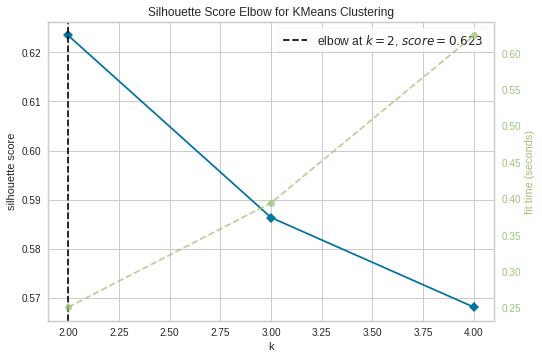

In [13]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,5), metric='silhouette') #k IS THE RANGE OF  number to my cluster, from 2 to 9
visualizer.fit(df_pca)
visualizer.poof()

## AGGLOMERATIVE CLUSTERING

In [10]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

from sklearn.decomposition import PCA
W=X.sample(frac=.2, axis=0, random_state=0)

pca = PCA(0.95)
pca.fit(W)
df_pca = pca.transform(W)
df_pca.shape




(20099, 1)

In [11]:
df_pca = pd.DataFrame(df_pca, columns = ['PC'+str(i) for i in range(1,2)]) #on choisit 2 PCA
df_pca

,PC1
0,-39423.813797
1,154.348201
2,29747.170610
3,-34486.696440
4,-16523.973754
...,...
20094,-25924.800008
20095,11262.914707
20096,-12814.703426
20097,-1553.122438


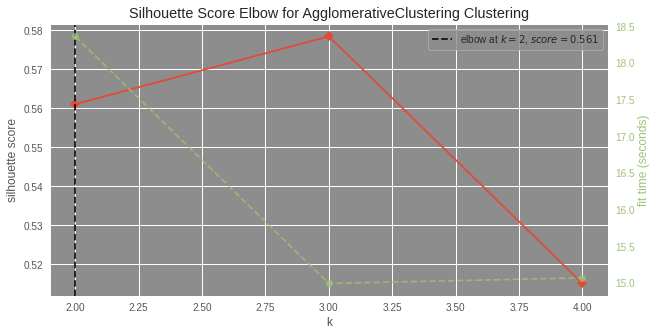

In [12]:
agc = AgglomerativeClustering()

visualizer = KElbowVisualizer(estimator = agc, k = (2,5), metric='silhouette')
visualizer.fit(df_pca)
visualizer.poof()

## GAUSSIAN MISTURE MODEL

In [27]:
# find the optimal numbers of clusters with GAUSSIAN
from sklearn.mixture import GaussianMixture

dict_model={}
for i in range (2,6):
    gmm = GaussianMixture(n_components=i)
    gmm.fit(df_pca)
    key="gmm"+str(i)
    dict_model[key] = gmm.predict(df_pca)

dict_model

{'gmm2': array([1, 0, 0, ..., 0, 0, 0]),
 'gmm3': array([2, 1, 0, ..., 0, 1, 1]),
 'gmm4': array([0, 2, 2, ..., 2, 2, 2]),
 'gmm5': array([4, 3, 3, ..., 0, 3, 3])}

In [28]:
def unsupervised_metrics(X, y_pred):

    from sklearn import metrics
    from sklearn.metrics import silhouette_score, calinski_harabasz_score

    score_ss = metrics.silhouette_score(X, y_pred)
    score_vrc = metrics.calinski_harabasz_score(X, y_pred)
    
    print("Silhouette Coefficient: %0.3f" % score_ss)
    print('Variance Ratio Criterion: %0.3f' % score_vrc)

for key in dict_model:
    print('\n', key)
    unsupervised_metrics(X=X, y_pred=dict_model[key])
    


 gmm2
Silhouette Coefficient: 0.620
Variance Ratio Criterion: 291476.437

 gmm3
Silhouette Coefficient: 0.578
Variance Ratio Criterion: 382330.351

 gmm4
Silhouette Coefficient: 0.555
Variance Ratio Criterion: 469877.177

 gmm5
Silhouette Coefficient: 0.539
Variance Ratio Criterion: 552613.912


##  DBSCAN

In [15]:
def unsupervised_metrics(X, y_pred):
    """
    Function to evaluate models based on different metrics:
    Homogeneity, Completeness, V-measure, adjusted_rand, AMI, 
    Silhouette Coefficient, Variance Ratio Criterion, Fowlkes Mallows
    
    """
    from sklearn import metrics
    from sklearn.metrics import silhouette_score, calinski_harabasz_score

    score_ss = metrics.silhouette_score(X, y_pred)
    score_vrc = metrics.calinski_harabasz_score(X, y_pred)

      
    print("Silhouette Coefficient: %0.3f" % score_ss)
    print('Variance Ratio Criterion: %0.3f' % score_vrc)

In [16]:
from sklearn.cluster import DBSCAN

In [22]:
dict_model={}
k=0
for eps in range (1,5):
    for min_samples in range (2,5):
        k=k+1
        db = DBSCAN(eps=eps/100, min_samples=min_samples)
        print("db"+str(k))
        print(db)
        db.fit(X)
        key="db"+str(k)
        dict_model[key] = db.labels_
        cl=len(np.unique(db.labels_))
        print("number of clusters: ", cl )
    


dict_model

db14
DBSCAN(eps=0.02, min_samples=3)
number of clusters:  2
db15
DBSCAN(eps=0.03, min_samples=3)
number of clusters:  2
db16
DBSCAN(eps=0.04, min_samples=3)
number of clusters:  2
db14
Silhouette Coefficient: -0.170
Variance Ratio Criterion: 1.504
db15
Silhouette Coefficient: -0.170
Variance Ratio Criterion: 1.504
db16
Silhouette Coefficient: -0.170
Variance Ratio Criterion: 1.504


In [ ]:

for key in dict_model:
    print( key)
    unsupervised_metrics(X=X, y_pred=dict_model[key])

In [ ]:
def unsupervised_metrics(X, y_pred):
    """
    Function to evaluate models based on different metrics:
    Homogeneity, Completeness, V-measure, adjusted_rand, AMI, 
    Silhouette Coefficient, Variance Ratio Criterion, Fowlkes Mallows
    
    """
    from sklearn import metrics
    from sklearn.metrics import silhouette_score, calinski_harabasz_score

    score_ss = metrics.silhouette_score(X, y_pred)
    score_vrc = metrics.calinski_harabasz_score(X, y_pred)
    
    print("Silhouette Coefficient: %0.3f" % score_ss)
    print('Variance Ratio Criterion: %0.3f' % score_vrc)

In [ ]:
for key in dict_model:
    print('\n', key)
    unsupervised_metrics(X=X, y_pred=dict_model[key])

In [ ]:
# fitting to splot

dbs= DBSCAN(eps=0.01, min_samples=2)
dbs.fit(X)
y_dbs = dbs.labels_ #y-pred=kmeans.labels_
#cl=y_dbs.nunique() #nombre de labels

data['dbs_cluster'] = dbs.labels_

fig, ax = plt.subplots()

plt.scatter(data=data, x='Household size', y='TV 8 radio services_30',c = y_dbs, cmap='viridis')

plt.show()

# KMEANS CLUSTERING

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(2) 
model.fit(df_pca) #ON fIT 
y_pred = model.predict(df_pca)

k_centers = model.cluster_centers_

merge_encode_zero["Cluster_consumer"]=y_pred
merge["Cluster_consumer"]=y_pred

from sklearn.metrics import silhouette_score
silhouette_score(X, y_pred)
silhouette_score(df_pca, y_pred)

In [ ]:
##Exporting File
file_url = r'C:\Users\Lenovo\Documents\INDE DATA\HOUSEHOLDNSS68CLUSTERS.csv'
merge.to_csv(file_url,index = False)


# FIRST  QUERIES ON DATASET WITH CLUSTERS

In [ ]:
# assign cluster variables
Cluster_consumer0 = merge[merge['Cluster_consumer']==0]
Cluster_consumer1 = merge[merge['Cluster_consumer']==1]

In [ ]:
#HISTORAMME SUR 1 COLONNE
f, ax = plt.subplots(1, 1, figsize=(8, 8))
Cluster_consumer0.Religion.value_counts().plot(kind='bar', title=" type", ax=ax, figsize=(8,8))
plt.show()

### CALCULATE THE POURCENTAGE OF RELIGIOUS CLASS ACCORDING THEIR SHARE IN THE SAMPLE

In [ ]:
merge.Religion.count()

In [ ]:
merge['Religion'].value_counts()

In [ ]:
df1 = merge.reset_index().groupby(['Religion']).size().to_frame('number')
df1['percentage'] = df1['number']*100/df1['number'].sum()
df1.round()
df1= df1.rename_axis('Religion').reset_index()
df1

In [ ]:
list(df1['percentage'].round())

In [ ]:
# importing library
import matplotlib.pyplot as plt
  
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', color='black')
  
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = ['Buddhism',
 'Christianity',
 'Hinduism',
 'Islam',
 'Jainism',
 'Others',
 'Sikhism',
 'Zoroastrianism']

y = [1.0, 7.0, 76.0, 13.0, 0.0, 1.0, 2.0, 0.0]
      
    # setting figure size by using figure() function 
    
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')
ggplot_styles = {'axes.facecolor': '8d8d8d'} 
plt.rcParams.update(ggplot_styles)
    
    # making the bar chart on the data
plt.bar(x, y)
      
    # calling the function to add value labels
addlabels(x, y)
      
    # giving title to the plot
plt.title("Percentage in the sample")
      
    # giving X and Y labels
plt.xlabel("Religion")
plt.ylabel("Percentage")
      
    # visualizing the plot
plt.show()

In [ ]:
df2 = Cluster_consumer0.reset_index().groupby(['Religion']).size().to_frame('number in the cluster')
df2['number in the class']=merge['Religion'].value_counts()
df2['% in the religious class']=(df2['number in the cluster']*100/df2['number in the class']).round()
df2['% in the population']=(df2['number in the class']*100/df2['number in the class'].sum()).round()
df2= df2.rename_axis('Religion').reset_index()
df2

In [ ]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', color='black')
  
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = list(df2['Religion'])
    y = list(df2['% in the religious class'])
      
    # setting figure size by using figure() function 
    
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')
ggplot_styles = {'axes.facecolor': '8d8d8d'} 
plt.rcParams.update(ggplot_styles)
    
    # making the bar chart on the data
plt.bar(x, y)
      
    # calling the function to add value labels
addlabels(x, y)
      
    # giving title to the plot
plt.title("Cluster_consumer0: Percentage of each religious class")
      
    # giving X and Y labels
plt.xlabel("Religion")
plt.ylabel("Percentage")
      
    # visualizing the plot
plt.show()

In [ ]:
df3 = Cluster_consumer1.reset_index().groupby(['Religion']).size().to_frame('number in the cluster')
df3['number in the class']=merge['Religion'].value_counts()
df3['% in the religious class']=(df3['number in the cluster']*100/df3['number in the class']).round()
df3['% in the population']=(df3['number in the class']*100/df3['number in the class'].sum()).round()
df3= df3.rename_axis('Religion').reset_index()
df3

In [ ]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', color='black')
  
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = list(df3['Religion'])
    y = list(df3['% in the religious class'])
      
    # setting figure size by using figure() function 
    
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')
ggplot_styles = {'axes.facecolor': '8d8d8d'} 
plt.rcParams.update(ggplot_styles)
    
    # making the bar chart on the data
plt.bar(x, y)
      
    # calling the function to add value labels
addlabels(x, y)
      
    # giving title to the plot
plt.title("Cluster_consumer1: Percentage of each religious class")
      
    # giving X and Y labels
plt.xlabel("Religion")
plt.ylabel("Percentage")
      
    # visualizing the plot
plt.show()

In [ ]:
merge['Cluster_consumer'].replace([0,1], ['ClusterC0','ClusterC1'], inplace=True)

In [ ]:
##Exporting File
file_url = r'C:\Users\Lenovo\Documents\INDE DATA\HOUSEHOLDNSS68CLUSTERSlabels.csv'
merge.to_csv(file_url,index = False)
##Exporting File